# <div align="center">Instituto Superior de Engenharia de Lisboa</div>
## <div align="center">Licenciatura em Engenharia Informática e Multimédia</div>
<br>
<div align="center">
  <img src="images/isel.png" alt="ISEL Logo" width="300">
</div>

## <div align="center"><b>Processamento de Imagem e Visão</b></div>

### <div align="center"><h1>Trabalho Prático 1 - Contagem e Classificação de Moedas</h1></div>

<br>
<div align="center">
  <b>Alunos:</b><br>
  A45885 André Silva<br>
  A47094 Pedro Azevedo <br><br>
  
  <b>Docente:</b>
  Pedro Jorge
</div>


# Índice
1. [Introdução](#introduction)

2. [Desenvolvimento](#desenvolvimento)

    2.1 [Metodologia](#metodologia)
    
    2.2 [Leitura de imagens](#image-reading)
    
    2.3 [Conversão para níveis de cinzento](#grayscale-conversion)
    
    2.4 [Binarização (cálculo automático de limiar)](#binarization)
    
    2.5 [Melhoramento da imagem](#image-enhancement)
    
    2.6 [Extracção de componentes conexos](#connected-components)
    
    2.7 [Extracção de propriedades](#property-extraction)
    
    2.8 [Classificação de objectos](#object-classification)
    
3. [Conclusões](#conclusao)

## 1. Introdução <a id="introduction"></a>

Os algoritmos de visão de computador permitem analizar, classificar e retirar informação das imagens assim como o humano o faz. No âmbito da unidade curricular de Processamento de Imagem e Visão, foi proposto o desenvolvimento de um algoritmo de visão de computador que permita contar a quantia em dinheiro das moedas em cima da mesa. Para tal, foi disponibilizado um conjunto de imagens de treino e teste, que servem de base para o desenvolvimento do algoritmo. Adicionalmente, foi lecionado nas aulas teóricas e práticas, um conjunto de técnicas e algoritmos que permitem a resolução deste problema. Como a binarização e melhoramento da imagem, extração de componentes conexos e extração de propriedades. Assim, para o desenvolvimento do trabalho, foi utilizado a linguagem de programação Python e a biblioteca OpenCV, que permite a utilização de algoritmos de visão de computador.

Neste relatório realizado em Jupyter Notebook, é apresentado o desenvolvimento do algoritmo, bem como a sua explicação e justificação. Para tal, o relatório está dividido em 5 secções, que correspondem às 5 fases de desenvolvimento do algoritmo. Cada secção é composta por uma breve explicação do algoritmo desenvolvido, acompanhado pela sua implementação em Python. 

## 2. Desenvolvimento <a class="anchor" id="desenvolvimento"></a>

### 2.1 Metodologia <a class="anchor" id="metodologia"></a>

Para desenvolver o algoritmo, seguiu-se o seguinte processo lecionado em aula, como se pode ver na figura 1. Este processo é executado em 5 fases, a binarização, melhoramento da imagem, extração de componentes conexos, extração de propriedades finalizando com a classificação de objetos.
<br>
<div align="center">
  <img src="images/metodologia.png" alt="metodologia" width="400">
    <p style="text-align:center;font-style:italic;">Fig.1 - Metodologia</p>
</div>


In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

### 2.2 Leitura de imagens <a name="image-reading"></a>

Para a leitura das imagens, foi utilizado a função imread da biblioteca OpenCV. Como a imagem é lida em BGR, foi necessário converter para RGB, para que a imagem seja apresentada corretamente.
Foi também criada uma função para fazer o *plot* das imagens, para a visualização das mesmas.

In [2]:
IMAGE_FILE_NAMES = [] ##Variável Global que contém os nomes dos ficheiros das imagens
IMAGES_DIRECTORY = 'coins/' ##Variável Global que representa a diretoria que contém as moedas.

def read_images(folder_path):
    images = []
    for image_in_folder in os.listdir(folder_path):
        IMAGE_FILE_NAMES.append(str(image_in_folder))
        image = cv2.imread(IMAGES_DIRECTORY + str(image_in_folder))
        img_RGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        images.append(img_RGB)
    return images

images = read_images('coins')

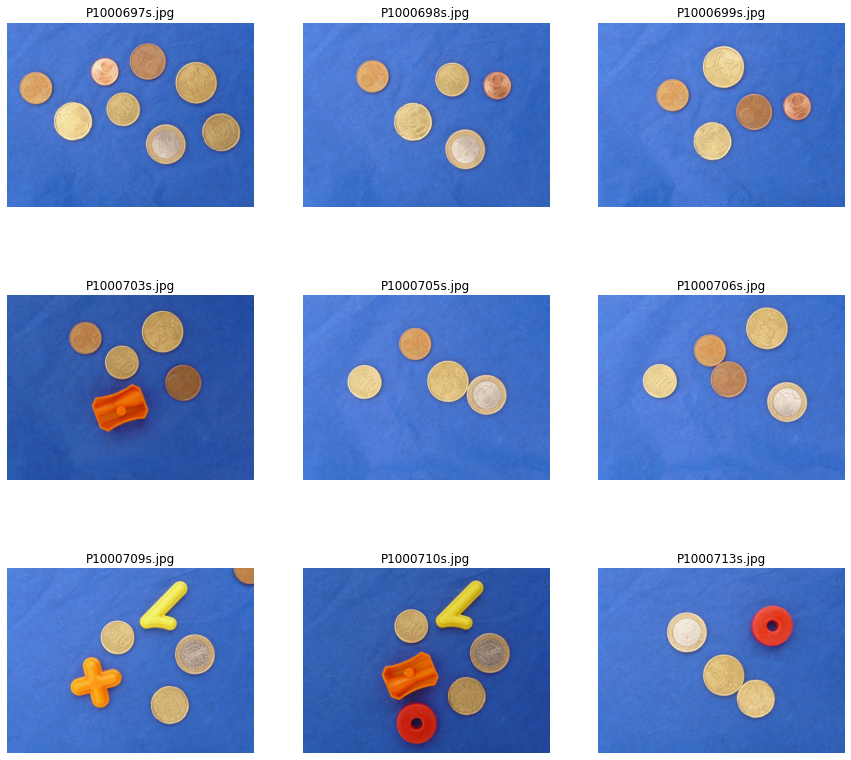

In [3]:
def plot_images(images, titles = None):
    num_images = len(images)
    num_rows = (num_images + 2) // 3


    fig, subplots = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))

    for i in range(num_images):
        row = i // 3
        col = i % 3
        subplots[row, col].imshow(images[i], cmap='gray')

        if titles:
            subplots[row, col].set_title(titles[i])

        subplots[row, col].axis('off')


    for i in range(num_images, num_rows * 3):
        row = i // 3
        col = i % 3
        subplots[row, col].axis('off')

    plt.subplots_adjust(hspace=0.01)  # Adjust the hspace value as needed

    plt.show()


plot_images(images,IMAGE_FILE_NAMES)

### 2.3 Conversão Para Níveis de Cinzento <a name="grayscale-conversion"></a>

Antes de simplesmente se fazer a conversão para níveis de cinzento da imagem com cor extraiu-se 3 listas com as componentes RGB das imagens para ser feita a análise das mesmas. Após esta análise podemos escolher a componente que tiver um maior contraste na imagem para que o processo de binarização tenha um maior sucesso.

Para isso implementou-se o método *get_RGB* que percorre todas as imagens e no fim retorna os arrays de cada componentes de cor destas.


Componente Vermelha


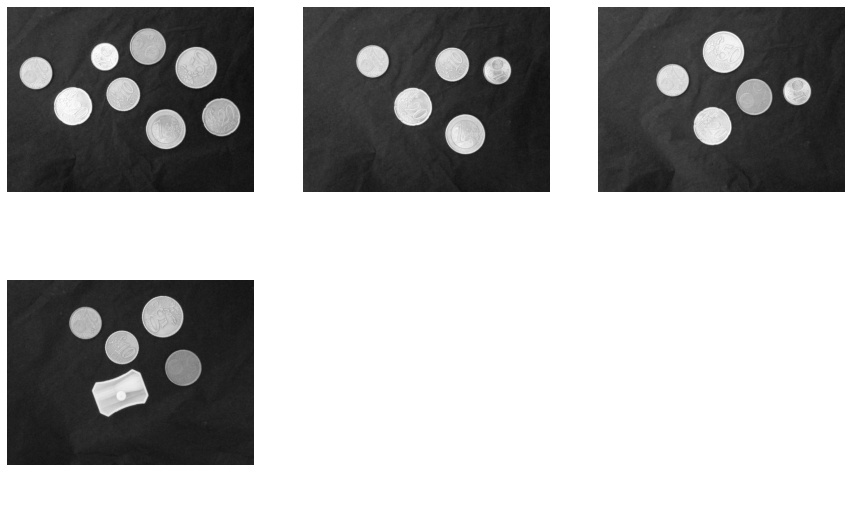

Componente Verde


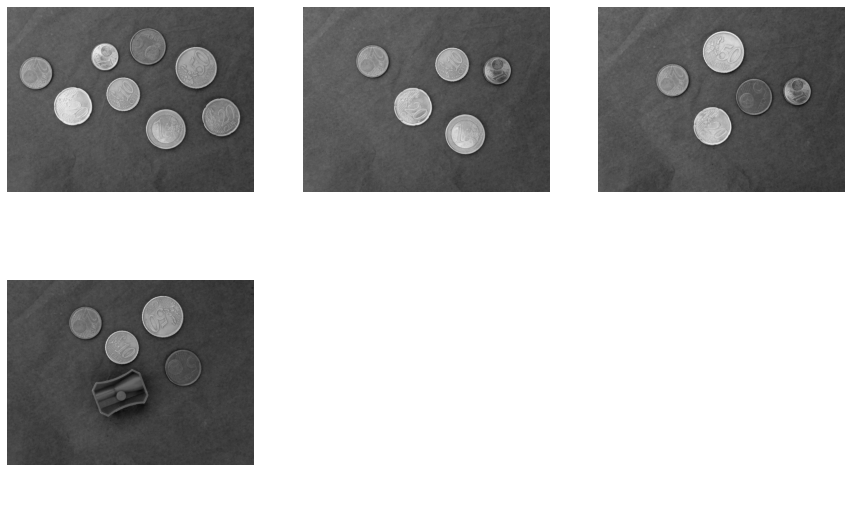

Componente Azul


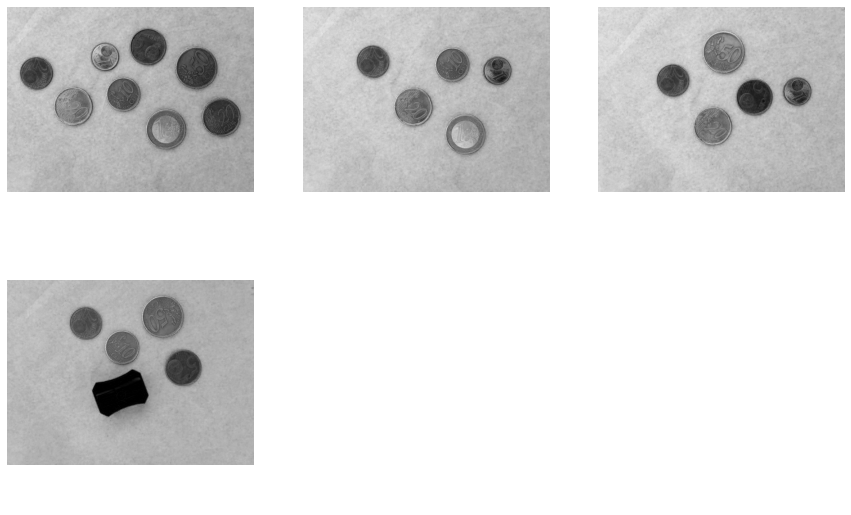

In [4]:
def get_RGB(images):
    images_R = []
    images_G = []
    images_B = []
    for image in images:
        R = image[:, :, 0]
        G = image[:, :, 1]
        B = image[:, :, 2]
        images_R.append(R)
        images_G.append(G)
        images_B.append(B)
        
    return images_R, images_G, images_B
        
images_R, images_G, images_B = get_RGB(images)

print("Componente Vermelha")
plot_images(images_R[:4])
print("Componente Verde")
plot_images(images_G[:4])
print("Componente Azul")
plot_images(images_B[:4])

Apenas companrando as imagens, começa-se a ter a ideia que a componente do *Red* é onde as moedas conseguem ter um melhor contraste com a mesa. No entanto, para ter a certeza, é necessário analisar os histogramas das imagens primeiras 4 imagens. É importante referir que se colocou uma reta perpendicular ao eixo das abcissas para representar a média dos dados em cada histograma para ter mais ou menos uma ideia de onde o *threshold* ficaria.

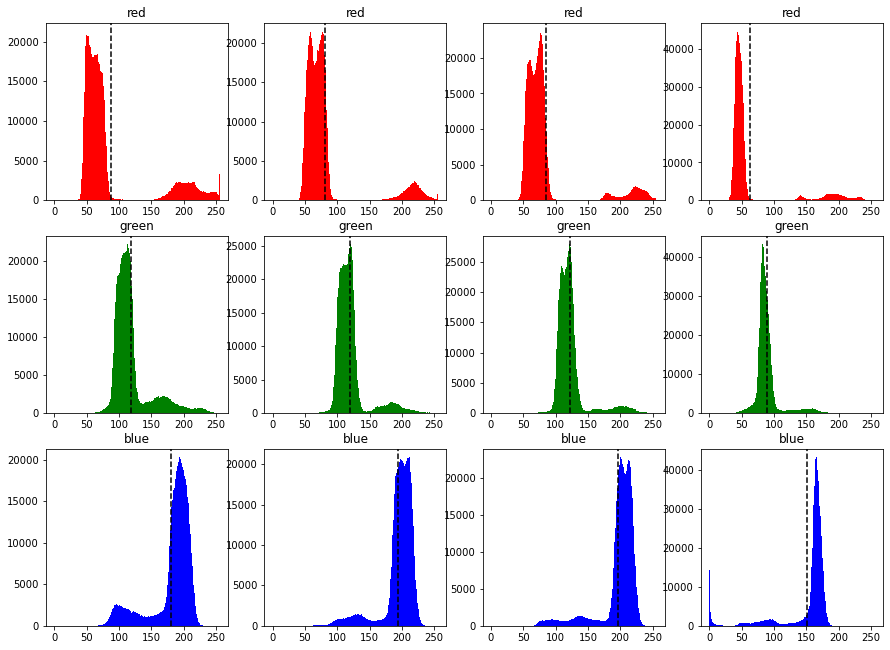

In [5]:
plt.figure(figsize=(15, 15))

for i in range(4):
    image = images[i]
    plt.subplot(4, 4, i+1)
    plt.axvline(x=np.mean(images_R[i]), color='black', linestyle='--', label='Threshold')
    plt.hist(image[:, :, 0].ravel(), 256, [0, 256],color='red')
    plt.title("red")

    plt.subplot(4, 4, i+5)
    plt.axvline(x=np.mean(images_G[i]), color='black', linestyle='--', label='Threshold')
    plt.hist(image[:, :, 1].ravel(), 256, [0, 256],color='green')
    plt.title("green")

    plt.subplot(4, 4, i+9)
    plt.axvline(x=np.mean(images_B[i]), color='black', linestyle='--', label='Threshold')
    plt.hist(image[:, :, 2].ravel(), 256, [0, 256],color='blue')
    plt.title("blue")


Como se pode ver nos histogramas, a componente *Red* é onde se consegue obter um melhor contraste entre as moedas e a mesa, pois nos histogramas da compontente vermelha e verde podemos ver o fundo do lado esquerdo, enquanto no direito temos os restantes objetos, sendo que existe uma maior diferença entre os dois no histograma da componente vermelha.
 Assim, a componente *Red* é a que se vai utilizar para a binarização.
 É também importante referir que na componente Vermelha das imagens, consegue-se notar uma distância maior entre as observações do fundo da imagem (primeiros blocos no gráfico com maior número de observações) e os blocos do lado direito do gráfico (blocos com a informação da componente R nos objetos da imagem) podendo assim garantir que o *threshold* é mais seguro nesta componente devido à distância entre as duas observações.

### 2.4 Binarização <a name="binarization"></a>
Para a binarização, foi utilizado uma combinação entre algoritmo de *OTSU* e o algoritmo Binário normal.
No algoritmo de *OTSU* recorre-se ao histograma da imagem de modo a segmentar os objetos através da minimização da variância nas duas classes, resultando o valor ótimo de *threshold*.
Por outro lado, numa binarização tradicional define-se um *threshold* em que tudo o que ficar acima deste fica a branco (255) e tudo o que for inferior a este fica a preto (0). Neste caso, observando o histograma da componente vermelha concluiu-se que o valor a utilizar ronda os 120.

Utilizou-se a função do OpenCV *threshold* com o algoritmo de *OTSU* e o algoritmo *BINARY*.

É importante também referir que se implementou um método para realizar um filtro *GaussianBlur* com um kernel (9,9) nas imagens antes da binarização evitando que após a binarização existam buracos relativamente grandes dentro das moedas.


In [6]:
def apply_thresholding(image):
    _, binary_image = cv2.threshold(image, 120, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return binary_image

def apply_thresholding_images(images):
    binarized_images = []
    for i in range(len(images)):
        thresholded_image = apply_thresholding(images[i])
        binarized_images.append(thresholded_image)
    return binarized_images

def apply_blur(images):
    array_blur = []
    for i in range(len(images)):
        blured_image = cv2.GaussianBlur(images[i],(9,9),cv2.BORDER_DEFAULT)
        array_blur.append(blured_image)

    return array_blur

blured_images =  apply_blur(images_R)
binary_images = apply_thresholding_images(blured_images)

### 2.5 Melhoramento da imagem - Operadores Morfológicos <a name="image-enhancement"></a>

Para classificar com uma melhor precisão as moedas, é necessário melhorar as imagens realçando as caracteristicas dos objetos. Para tal, recorreu-se a operadores morfológicos, que permitem melhorar a imagem, da erosão e da dilatação da imagem. Aplicar estes operadores, permite eliminar ruído, preencher buracos e separar os objetos, aspetos que podem ser prejudiciais para a classificação das moedas.

Nestas operações, está-se a aplicar um elemento estruturante do tipo *MORPH_ELLIPSE* por estarmos a lidar com objetos que são circulares (moedas) e este ter o melhor resultado quando se realiza as operações morfológicas nas imagens.
Neste caso, uma matriz em forma de elipse (26 por 26) percorre a imagem, *pixel* a *pixel*, aplicando a erosão e substituindo o píxel central pelo resultado da operação. O objetivo principal de aplicar a erosão na imagem é seprarar enventuais moedas juntas o que pode trazer problemas na extração de características.

Por fim, após as moedas estarem separadas aplicaou-se também uma dilatação na imagem com um *kernel* ligeiramente menor mas também em forma de elipse. Esta operação tem como obejtivo "devolver" a area que foi removida das moedas e os outros objetos durante a erosão.




Para realizar o processo descrito referido, criou-se o método *improve_binary_image* que recebe uma imagem após a binarização e aplica os operadores morfológicos descritos anteriormente. Seguidamente, implementou-se a função *improve_binary_images* que apenas percorre uma array de imagens binárias e aplica o método *improve_binary_image* em cada imagem e por fim retorna um array com o resultado de cada imagem após as operações morfológicas.

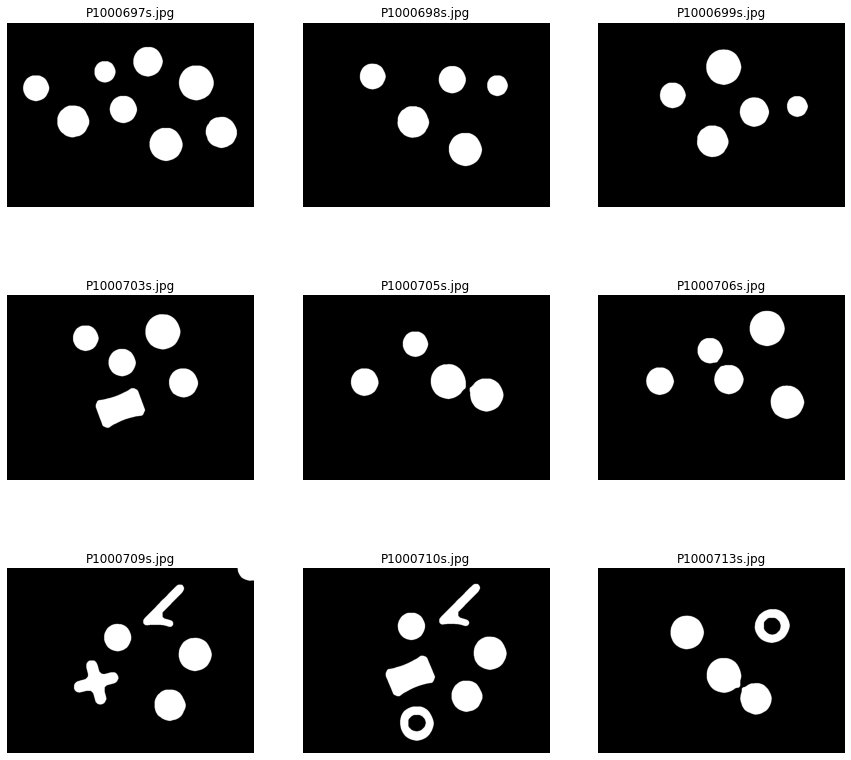

In [7]:
def improve_binary_image(binary_image):
    
    kernel_ellipse = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (26, 26))
    kernel_ellipse_2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (24, 24))

    improved_image = cv2.erode(binary_image, kernel_ellipse, iterations=2)
    improved_image = cv2.dilate(improved_image, kernel_ellipse_2, iterations=1)

    return improved_image


def improve_binary_images(binary_image_array):
    
    improved_array = []
    
    for i in range(len(binary_image_array)):
        improved_image = improve_binary_image(binary_image_array[i])
        improved_array.append(improved_image)
        
    return improved_array

improved_images =  improve_binary_images(binary_images)

plot_images(improved_images, IMAGE_FILE_NAMES)

Após o melhoramento das imagens através de operadores morfológicos, consegue-se verificar que moedas que estavam "coladas" foram separadas evitando assim erros na deteção de contornos.

### 2.6 Extracção de componentes conexos <a name="connected-components"></a>

Nesta etapa do trabalho é extraído os contornos das moedas para eventualemente serem extraídas caracteristicas das mesmas. Para esta etapa usou-se o método *findContours* que retorna um array com os contornos na imagem e um array *hierarchy* que vai ser utilizado para verificar se um contorno é *parent* ou *child*, isto é, se existem contornos dentro de outros contornos na imagem de modo a diferenciar os objetos circulares das moedas.

Para isto criou-se a função *find_contours_images* que percorre o array com todas as imagens e extrái os contornos e a hierarquia de cada imagem. Esta função retorna uma lista com os contornos de todas as imagens e uma lista com todas as hierarquias de todas as imagens.

Por fim, fez-se o *plot* das imagens para verificar os contornos nas imagens.


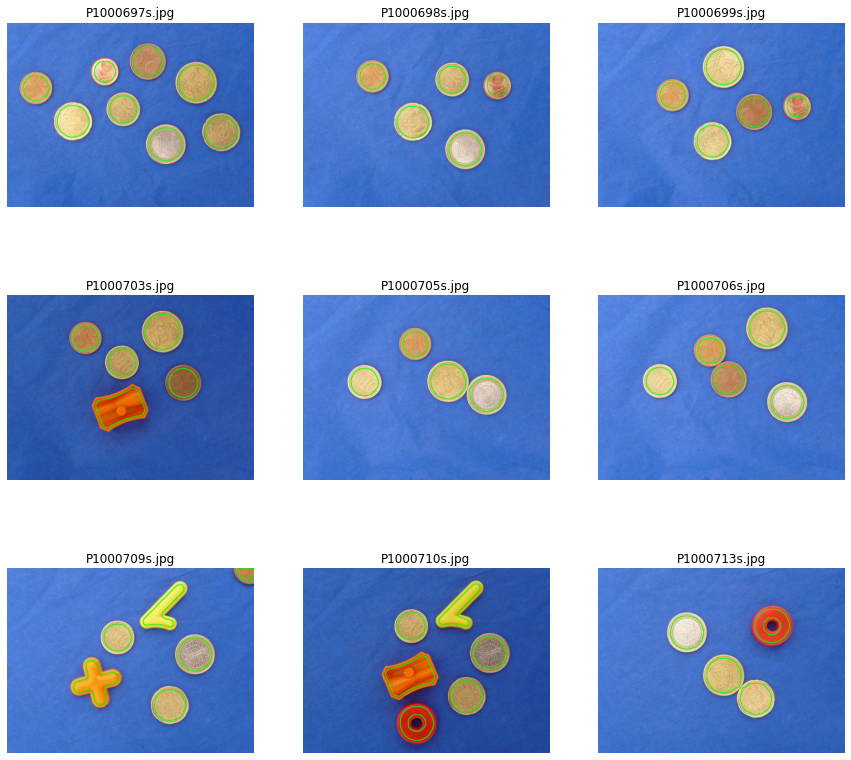

In [8]:
images_copy = np.copy(images)

def find_contours_images(image_array):

    contours = []
    hierarchy = []

    for i in range(len(image_array)):

        cnt, hr = cv2.findContours(image_array[i], cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

        contours.append(cnt)

        hierarchy.append(hr[0])

        cv2.drawContours(images_copy[i], cnt, -1, (0, 255, 0), 2)

    return contours, hierarchy

image_contours, images_hierarchy = find_contours_images(improved_images)

plot_images(images_copy, IMAGE_FILE_NAMES)


Após a observação das imagens após a deteção de contornos consegue-se verificar que os contornos estão bastante aceitáveis e que as moedas que estavam juntas têm os contornos separados devido às operações morfologicas efetuadas antes deste processo.

### 2.7 Extracção de propriedades <a name="property-extraction"></a>

Esta etapa do trabalho é de facto a mais importante, é aqui que se faz a extração de caracteristicas dos objetos na imagem.
É com base nas caracteristicas que na etapa seguinte de faz a classificação dos objetos. As caracteristicas que foram extraídas para cada contorno são:

* Área do contorno
* Se tem um contorno *parent* ou *child*
* O centro em pixeis do contorno na imagem
* A circularidade do objeto

A área do contorno é a característica que permite diferenciar as moedas no processo de classificação. A área obteve-se através o método *contourArea* da biblioteca cv2.

A circularidade do objeto é a caracteristica que permite diferenciar os objetos que são circulares ou não, portanto, objetos que não são circulares são logo descartados pelo classificador. Para fazer o cálculo da circularidade de cada contorno fez-se um rácio entre a área do contorno e a área expétavel do contorno se fosse um círculo perfeito.

 O cálculo da área expétavel do contorno foi feito através da fórmula $ A_{\text{expétavel}} = \frac{P^2}{4 \pi} $ em que P é o perimetro do contorno obtido através do método *arcLength* da biblioteca cv2.
 Após obter a área do contorno e a área expetável faz-se o rácio entre as duas e obtém-se a circularidade do controno.

A verificação de contornos *parent* ou *child* é importante visto que existe um objeto circular com um furo, ou seja, que contém um contorno exterior (*parent*) e um contorno interior (*child*), e este poderia ser confundido por uma moeda no nosso classificador. Para verificar se um contorno é *parent* ou *child* criou-se o método *detect_circular_object* que verifica no array *hierarchy* do contorno se na terceira ou quarta coluna se encontra algum número diferente de '-1' o que significa que o controno tem algum *parent* ou *child*. Este método retorna *True* se for *parent* ou *child* ou *False* caso contrário.

Por fim, extraiu-se as coordenadas (x,y) dos contornos na imagem para depois se colocar os valores das moedas nas imagens no processo de classificação. Para extrair estas coordenadas usou-se o método moments da ciclioteca cv2.




In [9]:
def detect_circular_object(countor_hierarchy):
    return countor_hierarchy[2] != -1 or countor_hierarchy[3] != -1

def get_caracteristics(image_contours, contour_hierarchy):

    image_caracteristics_list = []

    for i in range(len(image_contours)):

        caracteristics = []

        for j in range(len(image_contours[i])):

            moments = cv2.moments(image_contours[i][j])

            cX = int(moments['m10'] / moments['m00'])
            cY = int(moments['m01'] / moments['m00'])

            is_circular_object = detect_circular_object(contour_hierarchy[i][j])

            area = cv2.contourArea(image_contours[i][j])

            perimeter = cv2.arcLength(image_contours[i][j], True)
            expected_area = (perimeter ** 2) / (4 * np.pi)
            circularity = area / expected_area
            circularity = round(circularity, 2)

            caracteristics.append([area, circularity, (cX,cY), is_circular_object])

        image_caracteristics_list.append(caracteristics)

    return image_caracteristics_list



caracteristicas = get_caracteristics(image_contours , images_hierarchy)

### 2.8 Classificação de Objetos <a name="object-classification"></a>

Por fim chegamos à etapa final deste processo, a classificação das moedas com base nas caracteristicas de cada contorno.

Primeiramente fez-se um estudo sobre as áreas dos contornos para que na classificação seja possível classficar as moedas com base na sua área. É importante referir que se filtrou os dados de todos os contornos para que só apareça as moedas neste caso. Depois ordenaram-se os contornos com base nas áreas por ordem decrescente e fez-se o plot das areas.


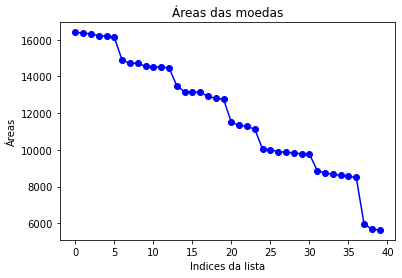

In [10]:
#filtrar as caracteristicas para apenas obter os dados das moedas

filtered_data = []
for image_cr in caracteristicas:
    for caract in image_cr:
        if caract[3] == False and caract[1] >= 0.85:
            filtered_data.append(caract)

#ordenar por ordem decresecente
sorted_data = sorted(filtered_data, key=lambda x: x[0], reverse=True)

#array só contendo as áreas
coin_areas = [item[0] for item in sorted_data]

plt.plot(coin_areas, marker='o', linestyle='-', color='b')
plt.xlabel('Indices da lista')
plt.ylabel('Áreas')
plt.title('Áreas das moedas')
plt.show()

Após se observar o plot das áreas, pode-se tirar as seguintes conclusões:
* Consegue-se observar 7 classes, uma para cada moeda (exceto a de 2 euros visto que não temos dados sobre esta moeda).
* A área da moeda de 0.50€ centimos ronda os 16200
* A área da moeda de 1.00€ centimos ronda os 14600
* A área da moeda de 0.20€ centimos ronda os 13000
* A área da moeda de 0.05€ centimos ronda os 11300
* A área da moeda de 0.10€ centimos ronda os 9800
* A área da moeda de 0.02€ centimos ronda os 8600
* A área da moeda de 0.01€ centimos ronda os 5800

Com isto em mente construiu-se um dicionário associando um *range* para cada valor de moeda, facilitando assim o processo de classificação.
É importante referir que os limiares definidos no dicionário esão um pouco superriores/inferiores aos valores médios de cada moeda visto que se deixarmos valores entre moedas que não estejam abrangidos pelo classificador, pode hvaer moedas em que a área seja um pouco diferente do valor médio (*outlier*) e esta moeda acabe por não ser classificada.

In [11]:
RANGES = {
    (7000, 9199): 0.02,
    (9200, 10599): 0.10,
    (10500, 12199): 0.05,
    (12200, 13999): 0.20,
    (14000, 15499): 1.00,
    (15500, 16600): 0.50,
}

Após o dicionário estar definido implementou-se o método *classificador* que através das caracteristicas de um contorno classifica qual a moeda a que o contorno pertence e retorna o valor desta. Este classficador é baseado numa árvore de decisão com as seguintes etapas:
* Vertificar se o contorno é um objeto que não é circular ou objeto que é circular, mas tem um furo e não é uma moeda.
* Verificar em que range do dicionário a área do contorno se insere e classificá-lo, se não estiver no dicionário e a área é menor que 7750 é classificado como uma moeda de 1 centimo, caso contrário, é a moeda de 2 euros.


In [12]:
def classificador(contour_caracteristics):

    coin_area = contour_caracteristics[0]
    is_circular_object = contour_caracteristics[3]
    circularity = contour_caracteristics[1]

    if is_circular_object or circularity < 0.85:
        return -1

    return next((v for (low, high), v in sorted(RANGES.items()) if low < coin_area <= high), 0.01 if coin_area <= 7750 else 2.00)

Por fim, apenas falta percorrer as imagens e classificar os contornos.

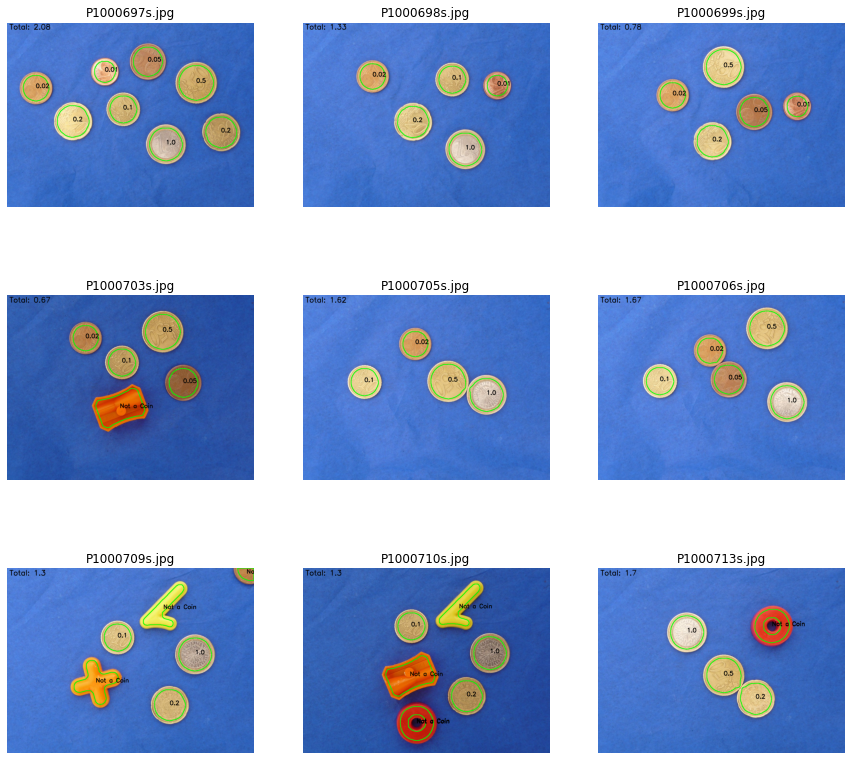

In [13]:
imagesValues = []
for image in caracteristicas:
    valores = []
    resultado = 0
    for crt in image:
        v = classificador(crt)
        valores.append(v)
        if v != -1:
            resultado = round(resultado + v,2)
    valores.append(resultado)
    imagesValues.append(valores)


for i in range(len(imagesValues)):
    for j in range(len(imagesValues[i])-1):
        if imagesValues[i][j] != -1:
            cv2.putText(images_copy[i], str(imagesValues[i][j]), (caracteristicas[i][j][2][0], caracteristicas[i][j][2][1]), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 0), 2)
        else:
            cv2.putText(images_copy[i], 'Not a Coin', (caracteristicas[i][j][2][0], caracteristicas[i][j][2][1]), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 0), 2)
    cv2.putText(images_copy[i], 'Total: ' + str(imagesValues[i][-1]), (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2)

plot_images(images_copy, IMAGE_FILE_NAMES)

## 3. Conclusão <a name="conclusao"></a>


Em conclusão, foi aplicado um conjunto de operações como a binarização, melhoramento da imagem, extração de componentes conexos, extração de propriedades e classificação de objetos.
Assim verificou-se que se para este conjunto de imagens, deve-se utilizar a componente vermelha da imagem para a binarização devido ao contraste entre as moedas e a mesa. O processo começa pela binarização utilizando o método de OTSU, que calcula o limiar ótimo para a binarização. De seguida são aplicados operadores morfológicos para o melhoramento das imagens, eliminando ruído, preenchendo buracos e seprando os objetos, facilitando a classificação dos objetos presentes na imagem. Após o melhoramento da imagem, é extraído os contornos dos objetos, identificando se estes têm contornos interiores. Para classificar os objetos são extraídas certas propriedades, tais como a área, a circularidade e a hierarquia, podendo a seguir classificar os objetos. Para tal, é utilizado o classificador árvore de decisão, utilizando a circularidade para verificar se pode ser uma moeda, no caso do objeto ser considerado um círculo, a hierarquia, para verificar se o objeto circular tem contornos interiores, excluindo de ser moeda, por fim, através da área, define-se o valor da moeda.

Após correr as imagens de teste, verificou-se o que o resultado foi bem-sucedido tendo o classificador acertado em todas as classificações. Contudo, mesmo estando a funcionar corretamente, após a aplicação dos operadores morfológicos, os objetos não ficam perfeitos, sendo que as moedas diminuem de tamanho devido à erosão intensa efetuada nos operadores morfologicos, o que não é problema, pois o tamanho das moedas apesar de inferior acaba por ser sempre porporcional ao real.